In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as op
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing


In [16]:
import pandas as pd


heart = pd.read_excel("heart_disease.xlsx",
                      sheet_name='Heart_disease',
                      index_col=0)

# Preview the data
print(heart.head())


      sex               cp  trestbps  chol    fbs         restecg  thalch  \
age                                                                         
63   Male   typical angina       145   233   True  lv hypertrophy     150   
41   Male  atypical angina       135   203  False          normal     132   
57   Male     asymptomatic       140   192  False          normal     148   
52   Male   typical angina       118   186  False  lv hypertrophy     190   
57   Male     asymptomatic       110   201  False          normal     126   

     exang  oldpeak        slope          thal  num  
age                                                  
63   False      2.3  downsloping  fixed defect    0  
41   False      0.0         flat  fixed defect    0  
57   False      0.4         flat  fixed defect    0  
52   False      0.0         flat  fixed defect    0  
57    True      1.5         flat  fixed defect    0  


In [17]:
heart.head()

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,,,,,,,,,,,,
63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [18]:
label_encoder = preprocessing.LabelEncoder()
heart['cp']= label_encoder.fit_transform(heart['cp'])


In [19]:
x=heart.iloc[:,0:4]
y=heart['cp']

In [20]:
x

,sex,cp,trestbps,chol
age,,,,
63,Male,3,145,233
41,Male,1,135,203
57,Male,0,140,192
52,Male,3,118,186
57,Male,0,110,201
...,...,...,...,...
53,Male,0,125,0
62,Male,0,166,170
56,Male,2,170,0


In [21]:
y

,cp
age,
63,3
41,1
57,0
52,3
57,0
...,...
53,0
62,0
56,2


In [22]:
heart['cp'].unique()

array([3, 1, 0, 2])

In [23]:
heart['cp'].value_counts()

,count
cp,
0,495
2,203
1,165
3,45


In [24]:
colnames = list(heart.columns)
colnames

['sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'thal',
 'num']

In [25]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [29]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# 1. Create a LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# 2. Fit and transform the 'Sex' column
heart['sex'] = label_encoder.fit_transform(heart['sex'])

# 3. Now define your features (x) and target (y)
x = heart.iloc[:,0:4]
y = heart['cp']

# 4. Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

# 5. Create and train your DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2)

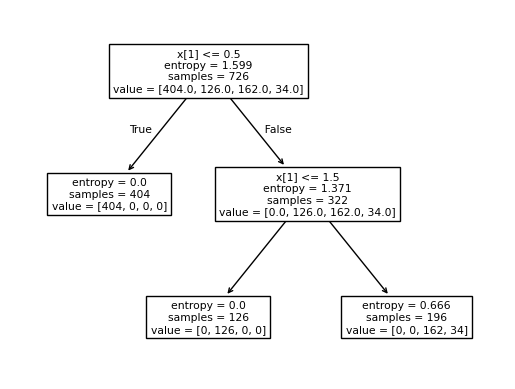

In [31]:
#PLot the decision tree
tree.plot_tree(model);


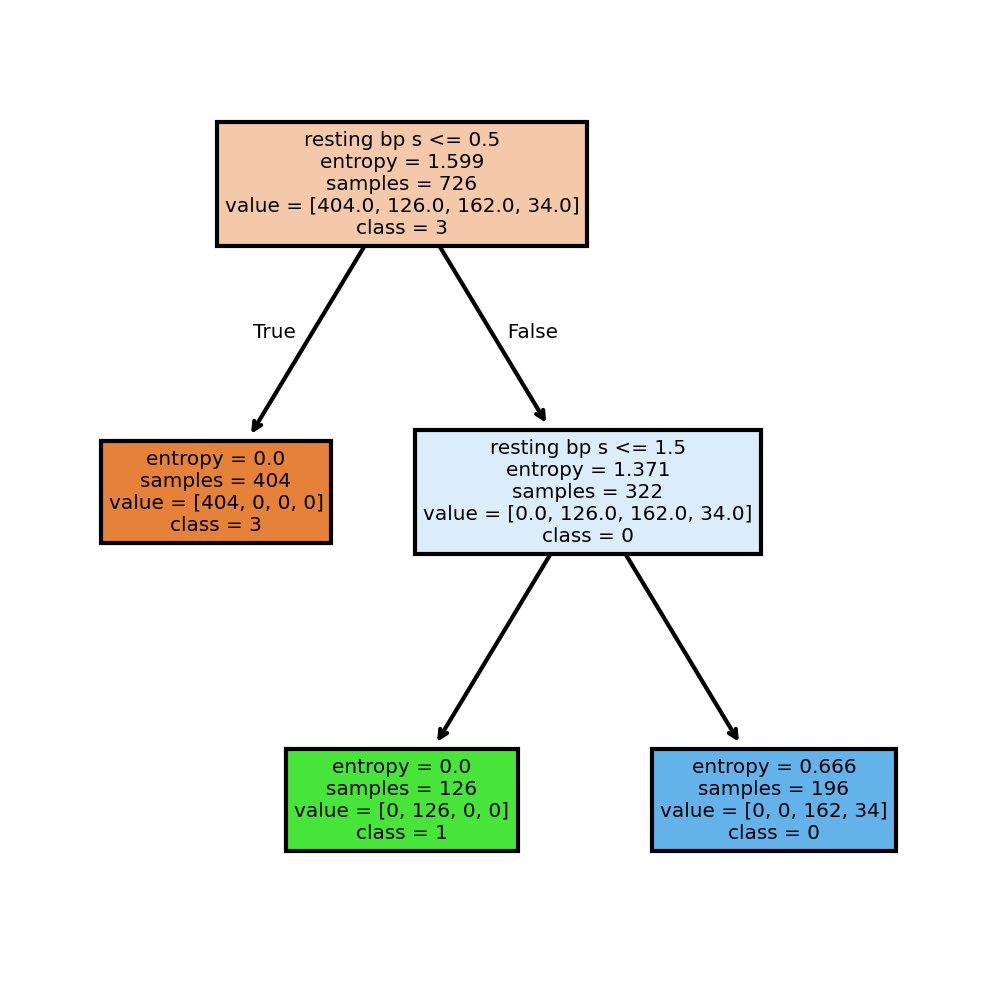

In [34]:
# Assuming your heart disease dataset has these feature and class names
fn = ['Chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar']  # Replace with your actual feature names
cn = heart['cp'].unique().astype(str)  # Get unique age values and convert to string
# cn = ['Age Group 1', 'Age Group 2', 'Age Group 3'] #or provide the age groups yourself if you know them

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(model,
               feature_names=fn,
               class_names=cn,
               filled=True);

In [35]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,91
2,52
1,39


In [36]:
preds

array([2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2,
       0, 2, 2, 0, 0, 2])

In [37]:
pd.crosstab(y_test,preds)

col_0,0,1,2
cp,,,
0,91,0,0
1,0,39,0
2,0,0,41
3,0,0,11


In [38]:
np.mean(preds==y_test)

0.9395604395604396

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [40]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.9395604395604396

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
array = heart.values
X = array[:,0:3]  # This selects the first column (index 0) for X.
y = array[:,0]   # This selects the first (and only) column for y.

In [44]:
model = DecisionTreeRegressor()
model.fit(X, y)

DecisionTreeRegressor()

In [45]:
#Find the accuracy
model.score(X,y)

1.0

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming 'heart' is your DataFrame and it has the necessary columns
# Extract features and target for the DecisionTreeRegressor
array = heart.values
X = array[:, 0:3]  # Select the first 3 columns for training
y = array[:, 0]    # Select the first column as the target

# Create and train the DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X, y)

# Now, prepare your x_test to have the same 3 features used during training
x_test_regressor = x_test.iloc[:, 0:3]  # Select the same 3 columns from x_test

# Predict using the modified x_test_regressor
y_pred = model.predict(x_test_regressor) # Changed line to fix the error

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.21978021978021978
Precision: 0.21423541247484906
Recall: 0.21978021978021978
F1-Score: 0.16843297565325316


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
